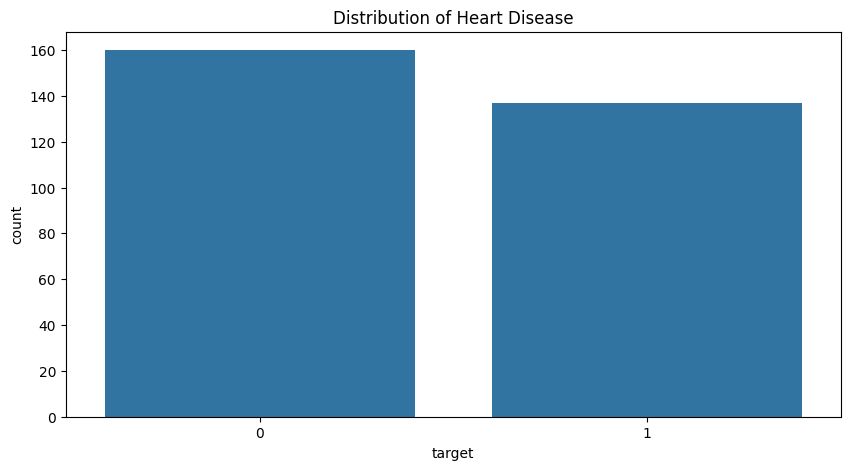

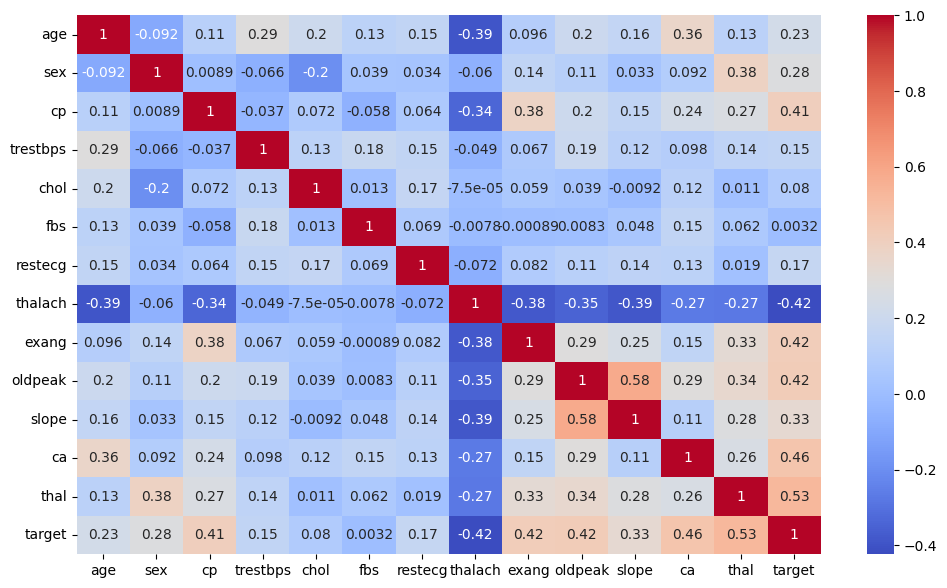

Test Accuracy: 0.7333333333333333
Model saved as heart_disease_model.pkl


c:\Users\amrabdelrazek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\amrabdelrazek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\amrabdelrazek\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amrabdelrazek\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import joblib


url = "processed.cleveland.csv"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns, na_values='?', delimiter=";")
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(10,5))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


X = df.drop('target', axis=1)
y = df['target']


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


joblib.dump(model, 'heart_disease_model.pkl')
print("Model saved as heart_disease_model.pkl")
